In [ ]:
import ipywidgets as widgets

import numpy as np
from matplotlib import pyplot as plt

### Creating data

In [ ]:
x = np.random.uniform(0,5,size = 100)
ep = np.random.normal(size = 100)

y = 2*x + ep

#### Slider // trying to get line to update without replotting the entire graph

In [ ]:
neuronplt_line = None

In [ ]:
def slope_viz(t=1):
    global neuronplt_line
    if neuronplt_line is None:
        plt.scatter(x,y)
        #plt.plot(x_values, m*x_values, lw = 3, color = "black")
        plt.ylim(-1.2,12.2)
        neuronplt_line = plt.axvline(t, color='red', linestyle='--', )
    else:
        neuronplt_line.set_xdata(t)
        plt.draw()
        plt.show()


In [ ]:
widgets.interact(slope_viz,t=(0.0,5,0.01)) #first argument is the function information is being sent to, second is the argument

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider
import numpy as np

# Create some sample data
x = [1, 1]
y = [1, 2]

# Define a function to update the plot
def update_plot(val):
    fig, ax = plt.subplots()
    plt.xlim(0, 10)
    plt.ylim(0, 3)
    ax.axvline(val, color='r')  # Adjust y-coordinates as desired
    plt.show()

# Create a slider widget
slider = FloatSlider(value=1, min=0, max=10, step=0.1)

# Connect the slider widget to the update function
interactive_plot = interactive(update_plot, val=slider)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


3


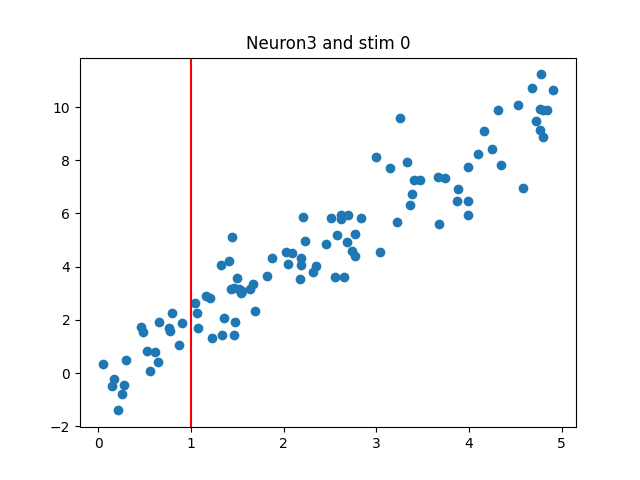

0.1
0.2
0.6
0.8
1.1
1.2
7
1.3
1.4
1.8
2.2
2.3
2.4
2.8
3.2
3.5
3.7
2.8
2.5
1.9
1.5
1.2
1.0
1.3
2.5
2.4
1.1
0.8
1.0
1.6
1.7
1.6
6


In [3]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np 
# import warnings
# warnings.filterwarnings("ignore")

# Create the plot
neuronplt_fig, neuronplt_ax = plt.subplots()
neuronplt_line = None

def plot_data(change,prep = None, stim = 0):
    global neuronplt_fig, neuronplt_ax, neuronplt_line
    
    #setting neuron id based on input
    if isinstance(change, int):
        neuron_id = change
    else:
        neuron_id = change.new

    # clearing graph + making new line (only happens when whole plot changes)
    neuronplt_ax.clear()
    neuronplt_line = neuronplt_ax.axvline(x=1, color='r')

    # creating graph
    x = np.random.uniform(0,5,size = 100)
    ep = np.random.normal(size = 100)
    y = 2*x + ep
    neuronplt_ax.scatter(x,y)
    neuronplt_ax.set_title(f'Neuron{neuron_id} and stim {stim}')
    print(neuron_id)
    neuronplt_fig.canvas.draw_idle()
    
def update_line(val):
    global neuronplt_line, neuronplt_fig
    # Update the position of the vertical line based on the slider value
    neuronplt_line.set_xdata([val, val])
    # Redraw the plot
    neuronplt_fig.canvas.draw_idle()
    print(val)


time_slider = widgets.FloatSlider(value=0, min=0, max=5, step=0.1, description='Time')
time_slider.layout.width = '6.53in'
time_slider.layout.margin = '0 -4px'

neuron_dropdown = widgets.Dropdown(
    options= range(0,10),
    value=3,
    description='Neuron ID:',
)

plot_data(neuron_dropdown.value)

# Connect the slider's update event with the callback function
time_slider.observe(lambda change: update_line(change.new), names='value')
neuron_dropdown.observe(lambda change: plot_data(change.new), names='value')

# Display the plot and slider widget
# display(fig.canvas)

display(widgets.VBox([neuron_dropdown,time_slider]))


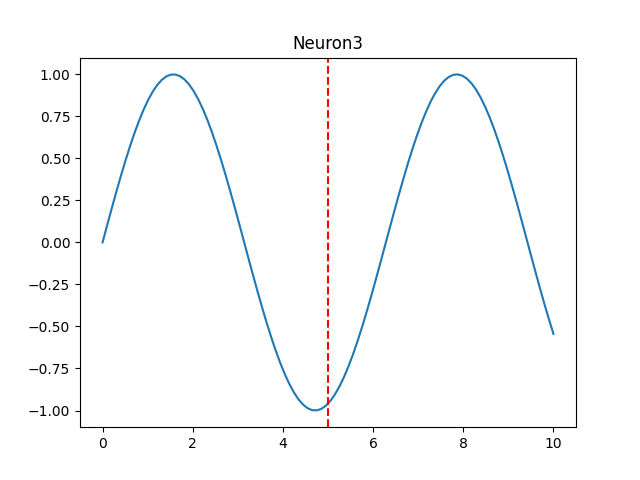

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Generate some random data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a figure and axis for the plot
s_fig, s_ax = plt.subplots()
n_line_obj = None  # Store the line object returned by plot()
s_vline = None   

def plot_data(change):
    if isinstance(change, int):
        stim_id = change
    else:
        stim_id = change.new

    global n_line_obj, s_vline, s_ax
    s_ax.clear()
    n_line_obj, = s_ax.plot(x, y)
    s_vline = s_ax.axvline(x=5.0, color='r', linestyle='--')  # Add initial vertical line
    s_ax.set_title(f'Neuron{stim_id}')


# Function to update the x value of the vertical line
def update_sline(position):
    global s_vline, s_fig
    position = position.new
    s_vline.set_xdata([position, position])  # Update x value of the vertical line
    s_fig.canvas.draw_idle()

time_slider = widgets.FloatSlider(value=0, min=0, max=5, step=0.1, description='Time')
neuron_dropdown = widgets.Dropdown(
    options=range(0, 10),
    value=3,
    description='Neuron ID:',
)

ui = widgets.VBox([neuron_dropdown, time_slider])

plot_data(neuron_dropdown.value)
time_slider.observe(update_sline, names='value')
neuron_dropdown.observe(plot_data,names='value')
display(ui)

## Incorporating Urchin:

In [ ]:
#Importing necessary libraries:
import oursin as urchin
import pandas as pd
urchin.setup()
# Define a quick convenience function for loading data
def get_data(url):
    data = url.replace("/edit#gid=", "/export?format=csv&gid=")
    df = pd.read_csv(data)
    return df
probe_data = get_data('https://docs.google.com/spreadsheets/d/1T-RG3d_MIBXZKmrGmLnsU-O7GmwY09Z0FY6yqbYyZXI/edit#gid=1457359713')
probe_data["theta"] = 90 - probe_data["theta"]
probe_data["phi"] = 270 - probe_data["phi"] 

In [ ]:
urchin.ccf25.load()

In [ ]:
urchin.ccf25.grey.set_visibility(True)
urchin.ccf25.grey.set_material('transparent-unlit')
urchin.ccf25.grey.set_color('#000000')
urchin.ccf25.grey.set_alpha(0.1)

In [ ]:
def probes_by_session(s = 1):
    session_probes = probe_data[probe_data["session"]==s]
    probes = urchin.probes.create(len(session_probes))
    urchin.probes.set_colors(probes,list(session_probes["color"].values))
    
    positions_list = []

    for i, row in session_probes.iterrows():
        position = [row['ap'], row['ml'], row['dv']]
        positions_list.append(position)

    urchin.probes.set_positions(probes, positions_list) #setting the positions within the renderer

    angles_list = []

    for i, row in session_probes.iterrows():
        angle = [row['phi'], row['theta'], 0] # roll is set to 0
        angles_list.append(angle)

    urchin.probes.set_angles(probes, angles_list) #setting the positions within the renderer

In [ ]:
widgets.interact(probes_by_session,s=(0.0,39,1.0))

### ignore code below:

In [ ]:
old_probes = []
    # if(len(old_probes)!= 0):
    #     urchin.probes.delete(old_probes)
    #old_probes =probes

In [ ]:
#old_probes = [] 
#if(len(old_probes)!= 0):
#        old_probes.delete()
slider = widgets.interact(probes_by_session,s=(0.0,39,1.0))
old_probes = slider.result

In [ ]:
from IPython.display import display
from ipywidgets import interactive

In [ ]:
w = interactive(probes_by_session, s=(0,39,1))

In [ ]:
display(w)